In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

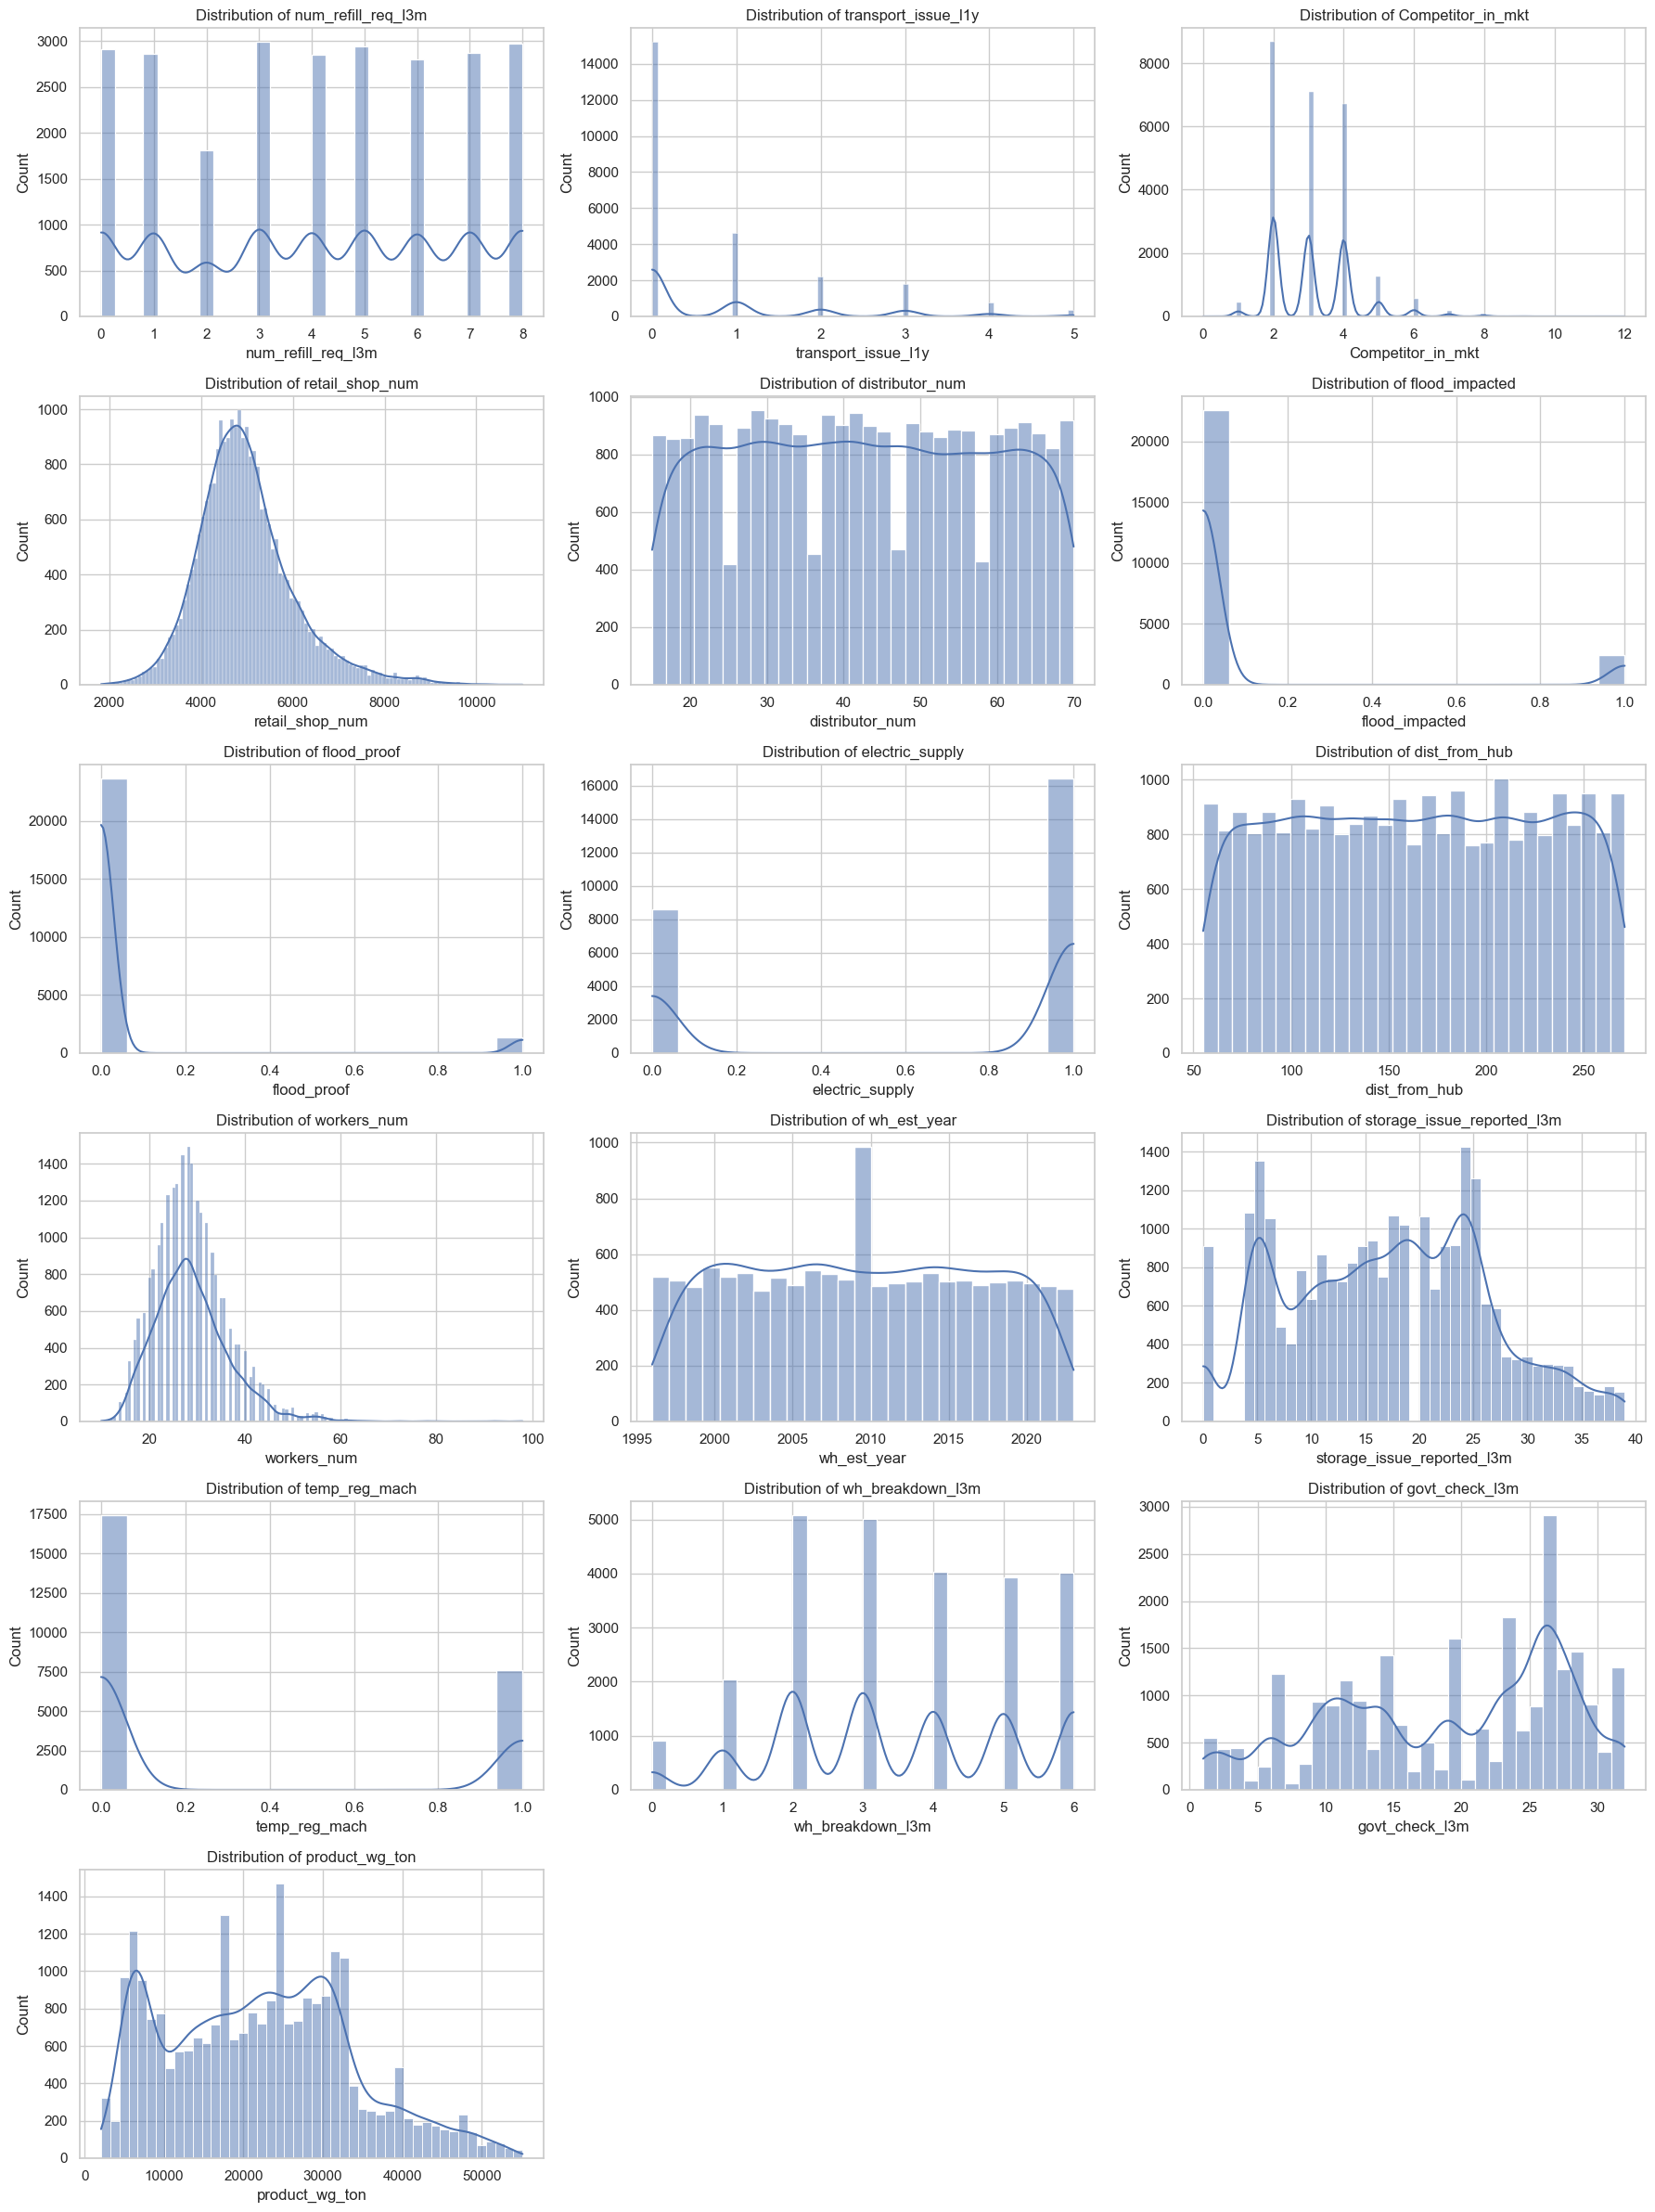

In [7]:
# Adjust number of plots dynamically based on the number of numerical columns
num_plots = len(numerical_cols)
cols = 3
rows = (num_plots + cols - 1) // cols  # Ceiling division to get number of rows

# Create subplots
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
axs = axs.flatten()

# Generate histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)

# Turn off any unused axes
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


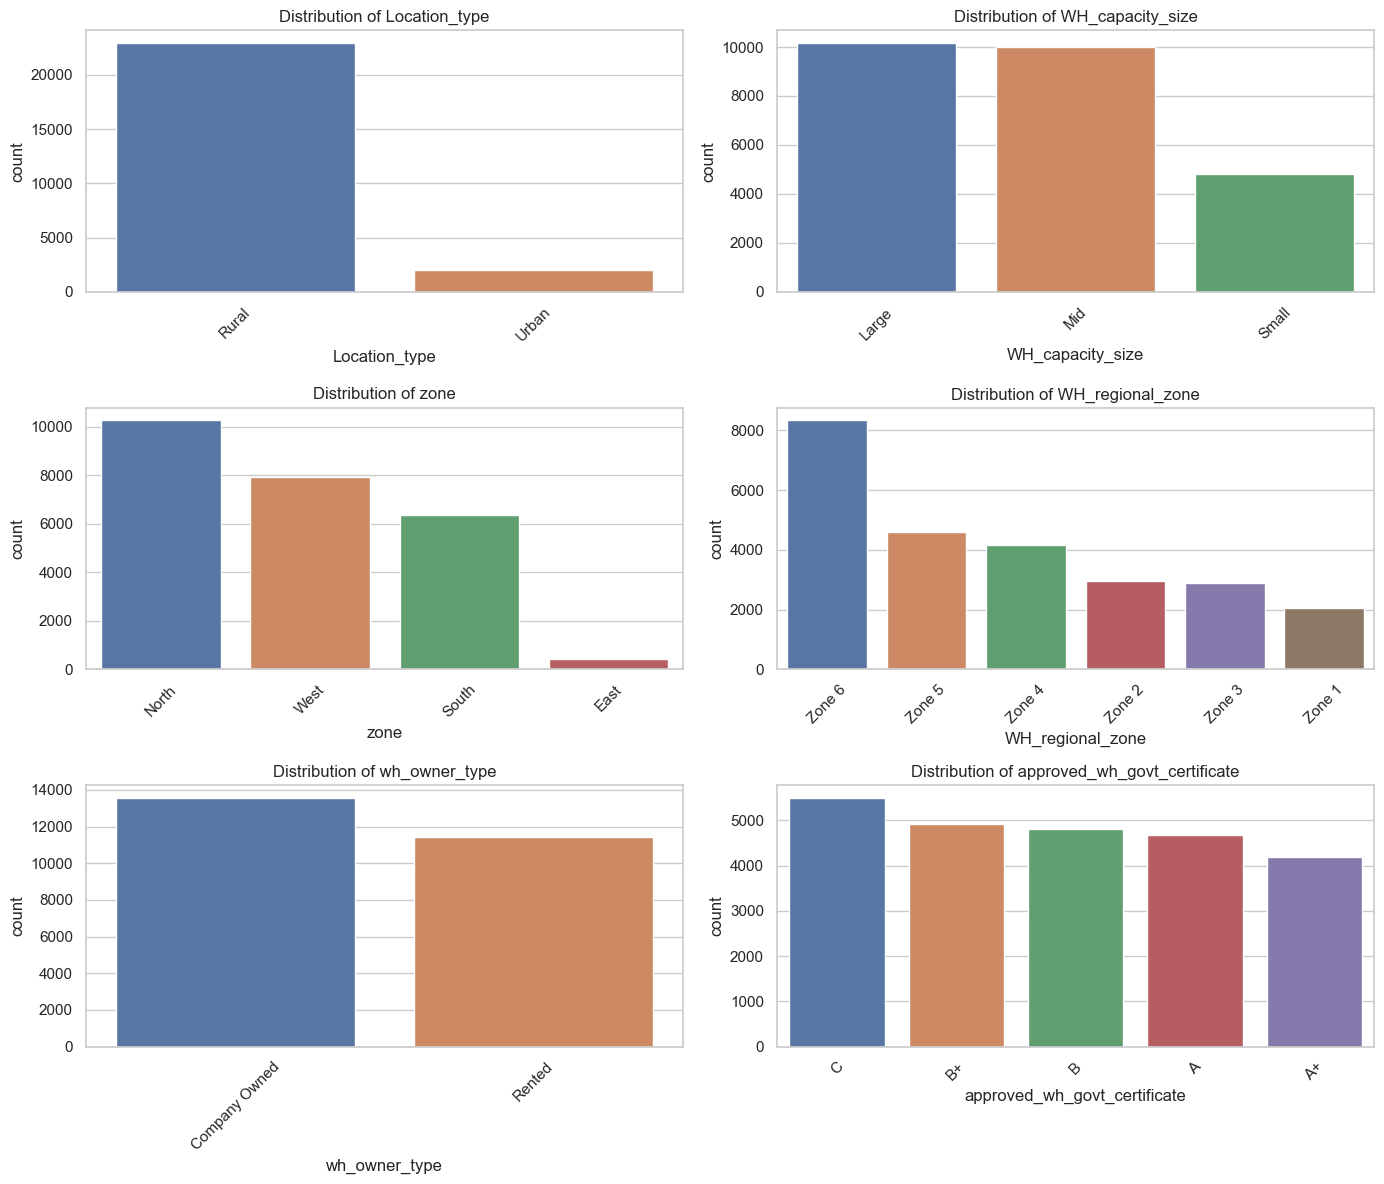

In [ ]:

categorical_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 
                    'wh_owner_type', 'approved_wh_govt_certificate']

# Create count plots for each categorical column
num_plots = len(categorical_cols)
cols = 2
rows = (num_plots + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(14, rows * 4))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=refined_imputed_df, x=col, order=refined_imputed_df[col].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


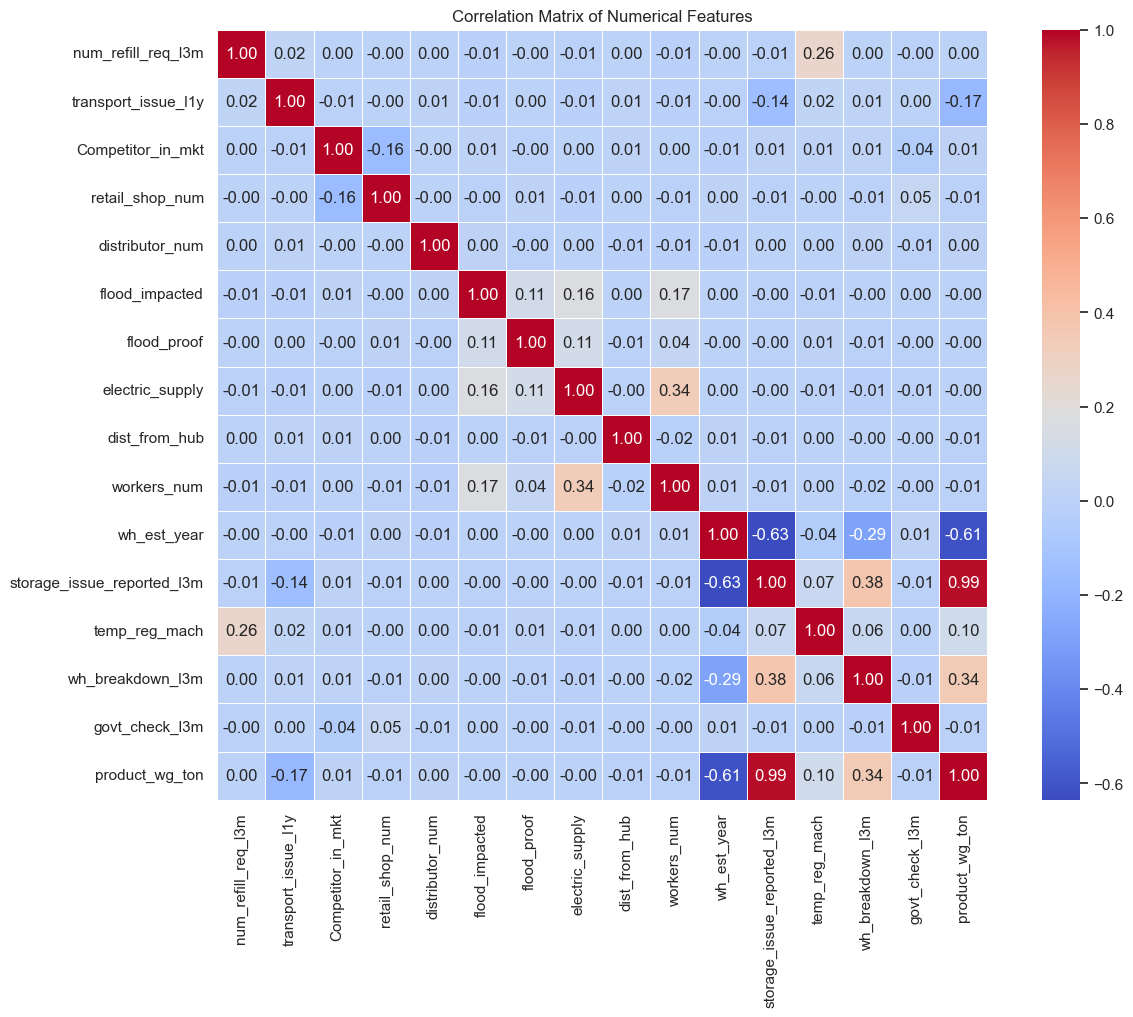

In [16]:
# Compute correlation matrix for numerical columns
correlation_matrix = refined_imputed_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Step 5: Zone-Wise or Regional Performance Analysis next

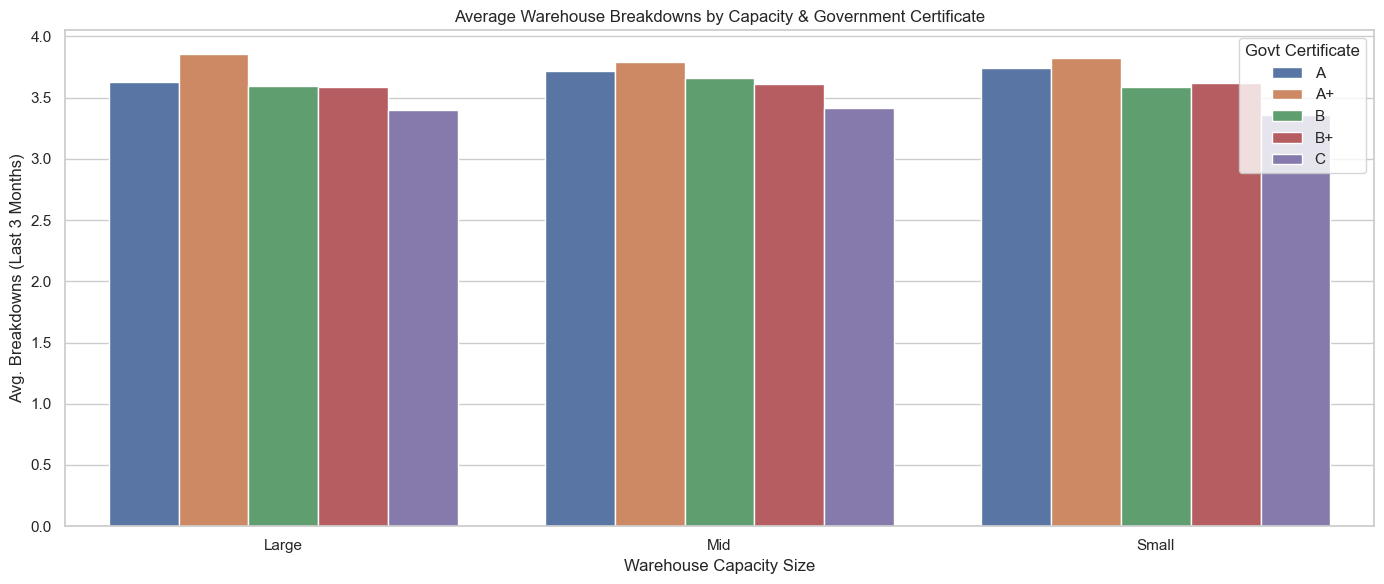

In [21]:
# Create a combined view of breakdowns by WH_capacity_size and approved certificate
breakdown_cert = df.groupby(['WH_capacity_size', 'approved_wh_govt_certificate'])['wh_breakdown_l3m'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=breakdown_cert, x='WH_capacity_size', y='wh_breakdown_l3m', hue='approved_wh_govt_certificate')
plt.title('Average Warehouse Breakdowns by Capacity & Government Certificate')
plt.ylabel('Avg. Breakdowns (Last 3 Months)')
plt.xlabel('Warehouse Capacity Size')
plt.legend(title='Govt Certificate')
plt.tight_layout()
plt.show()


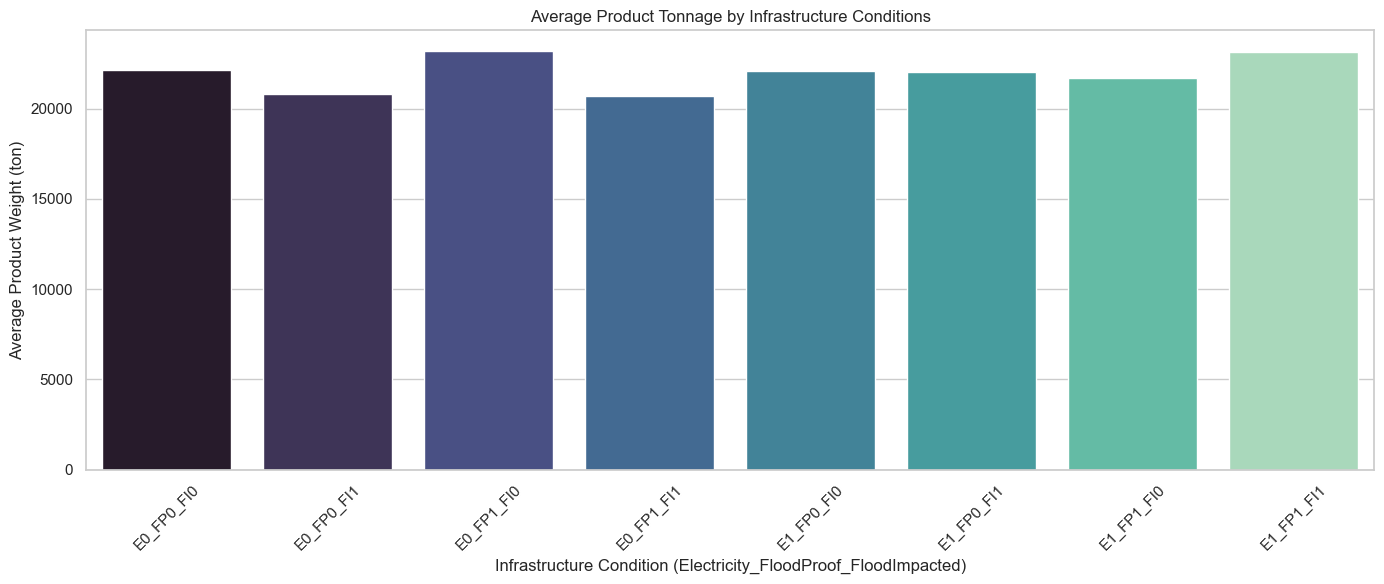

In [22]:
# Grouping by infrastructure conditions and calculating average product weight
infra_cols = ['electric_supply', 'flood_proof', 'flood_impacted']
infra_impact = df.groupby(infra_cols)['product_wg_ton'].mean().reset_index()

# Create a single feature to represent infrastructure condition
infra_impact['Infrastructure_Status'] = (
    'Electric_' + df['electric_supply'].astype(str) +
    '_FloodProof_' + df['flood_proof'].astype(str) +
    '_FloodImpacted_' + df['flood_impacted'].astype(str)
)

# Aggregate with the new column
infra_impact_plot = df.groupby(['electric_supply', 'flood_proof', 'flood_impacted'])['product_wg_ton'].mean().reset_index()
infra_impact_plot['Condition'] = (
    'E' + infra_impact_plot['electric_supply'].astype(str) +
    '_FP' + infra_impact_plot['flood_proof'].astype(str) +
    '_FI' + infra_impact_plot['flood_impacted'].astype(str)
)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=infra_impact_plot, x='Condition', y='product_wg_ton', palette='mako')
plt.title('Average Product Tonnage by Infrastructure Conditions')
plt.ylabel('Average Product Weight (ton)')
plt.xlabel('Infrastructure Condition (Electricity_FloodProof_FloodImpacted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import plotly.express as px

# Ensure correct column names and types
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={'ware_house_id': 'warehouse_id'}, inplace=True)

# Plotly scatter plot: Distance vs Product Weight, colored by warehouse capacity
fig = px.scatter(
    df,
    x="dist_from_hub",
    y="product_wg_ton",
    color="wh_capacity_size",
    title="Product Weight vs. Distance from Hub",
    hover_data=["warehouse_id", "wh_capacity_size", "zone"]
)

fig.show()


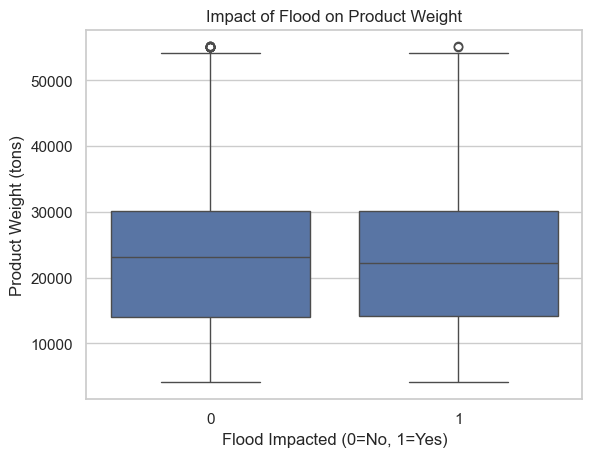

In [31]:
sns.boxplot(x="flood_impacted", y="product_wg_ton", data=df)
plt.title("Impact of Flood on Product Weight")
plt.xlabel("Flood Impacted (0=No, 1=Yes)")
plt.ylabel("Product Weight (tons)")
plt.show()

In [32]:
fig = px.line(
    df.sort_values("wh_est_year"),
    x="wh_est_year",
    y="product_wg_ton",
    title="Product Weight Over Warehouse Establishment Years"
)
fig.show()